# Introduction

## About This Dataset

- This dataset has 11 columns.  There are 4 numeric relevant numeric columns, 2 columns that act as keys adjacent columns, and 5 non-numeric columns.  

- There are many issues with this dataset: The columns **'children'** and **'days_employed'** have negative values. the **'children'** column also has a jump in age where everything looks normal through age 5, and then the next highest value is 20 which seems weird in two ways.  First such a big jump, next 20 is the only value higher than 5 and it occurs in many records. 

- There is something wacky going on with **'days_employed'** that has the average value (even with heavy negative values) being almost 175 years old and the oldest being about 1100 years old!  

- There are duplicates where the upper case and lower case don't match in **'education'**.

- **'days_employed'** and **'total_income'** share null values with a 1:1 correlation.

- These are my first impressions.  I'm sure a more thorough look at the data will reveal more insights. 

- **LETS BEGIN!**

## Open the data file and have a look at the general information. 

In [1]:
import pandas as pd

try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv') 
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [2]:
#df.value_counts(['education','income_type','family_status']) # works locally, but not in the hub

df['education'].value_counts()  # case sensitive issues
#df['income_type'].value_counts() # NO DUPLICATES! More than half 'income_type' values are "employee"
#df['family_status'].value_counts() # most are married. Clean list

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [3]:
#df
#df.sort_values(by='days_employed', ascending = False).head(25)
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


### Conclusion

- The **'children'** column has negative values.

- The **'children'** column has outliers.  The age 20 appears in 76 records, and the next lowest number is 5.  I am assuming this value was miskeyed and the intention is 2 children.

- The **'days_employed'** column has some problematic things. First, there are a lot of negative numbers which are not logical values for the column.

- Interestingly, the **'days_employed'** only has positive values for retirees, and no negative exist for retirees.  Everyone else has values <= 0.  

- The **'days_employed'** column has many issues.  The average worker has worked there for 173 years. While the median has for 3 years, a more reasonable value. There are 3445 records that have values equaling over 900 years of employment. The next lowest value after 900 years is a reasonable 50 years. All values over 900 are from retirees, and all remaining retirees have values of zero!

- The **'dob_years'** column has 101 values that have the age as being zero!

- There are a total of 2174 null values in **'days-employed'** and **'total_income'** they have a 1:1 correlation of null values. 

- Another issue with **'days_employed'** is they all have wacky decimals whereas I expected integer values. This leads me to believe the **'days_employed'** was improperly extracted from a database. This leads me to believe there is a pattern to the erroneous data. Likely having to do with numerical date values. I have not found the pattern

- I checked categorized data for duplicates.  The **'education'** column is has duplicates due to the cases not matching.

## Data preprocessing

### Processing missing values

In [4]:
df.loc[df['days_employed'] < 0, 'days_employed'] = abs(df['days_employed'])
df.loc[df['children'] < 0, 'children'] = abs(df['children'])
before_income = df['total_income'].isnull().sum()
before_dob_years = (df['dob_years']==0).sum()
df['total_income']= df.total_income.fillna(df.groupby('income_type')['total_income'].median())
df['dob_years'] = df['dob_years'].fillna(df['dob_years'].median())
after_income = df['total_income'].isnull().sum()
after_dob_years = (df['dob_years']==0).sum()
df.loc[df['children'] == 20, 'children'] = 2
df.loc[df['gender'] == 'XNA', 'gender'] = 'F' # there are 2x as many 'F' as 'M'
df['years_employed'] = df['days_employed'] / 365 # I think in years, not days.
df.loc[(df['years_employed']>51), 'years_employed']= 59 # average age of retirees
df.loc[(df['years_employed']<=0) &(df['dob_years']==0), 'years_employed']= df['dob_years']+59 # average age of retirees
df.loc[df['dob_years']==0, 'dob_years']= 43 # average age for workers < 65 years old
df.loc[df['years_employed']>= 51, 'years_employed']=30 # I gave retirees with odd high values 30 years.
df['days_employed'] = df['years_employed']*365
median = df['days_employed'].median()
df.loc[df['days_employed'].isnull(), 'days_employed'] = median
df.drop(['years_employed'], axis=1)

df.isnull().sum()

# Fields with missinig values

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
years_employed      2174
dtype: int64

#### Conclusion

- To the **'children'** column I applied the function **abs()** to correct negative numbers

- to the **'children'** column I changed the age 20, which I  appears in 76 records, to two.  I am assuming this value was miskeyed and the intention is 2 children.

- To the **'days_employed'** column I applied the function **abs()** to correct negative numbers.

- I created the **'years_employed'** column because it is hard for me to think in days.  Every **'years_employed'** value over 51 is getting replaced by their age minus 33 is the average difference of **'dob_years'**-**'years_employed'** = 33. I did the opposite for when the value is 0, so I added 33.

- The **'gender'** column has an unusual value which I replaced with 'F' since there are approximetly twice as many 'F' as 'M' in the recordset.  

- There are a total of 2174 null values in **'days-employed'** and **'total_income'** they have a 1:1 correlation of null values. These values seem crucial, therefore I am deleting the records where both are null.  

- Another issue with **'days_employed'** is they all have wacky decimals whereas I expected integer values. This leads me to believe the days employed was improperly extracted from a database. This leads me to believe there is a pattern to the erroneous data. Likely having to do with numerical date values. The only pattern I found was all the very high numbers were all for **retirees**, so I gave them all 30 years of service.  Please, advise if there is a preferred method.

- I checked categorized data for duplicates.  The **'education'** column is has duplicates due to the cases not matching, so I changed them all to lowercase.  

### Data type replacement

In [5]:
df[['days_employed','years_employed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   days_employed   21525 non-null  float64
 1   years_employed  19351 non-null  float64
dtypes: float64(2)
memory usage: 336.5 KB


In [6]:
# days_employed HAS MORE NON-NULL VALUES THAN years_employed
# FIX THIS!!!

df.days_employed = df.days_employed.astype(int)
df.years_employed = df.years_employed.astype(float) 
                                    #.(astype(int)) causes error

df[['days_employed','years_employed','total_income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   days_employed   21525 non-null  int64  
 1   years_employed  19351 non-null  float64
 2   total_income    19351 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 504.6 KB


#### Conclusion

- All the floating point values I changed to integer values.  

### Processing duplicates

In [7]:
df['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [8]:
# That looks horrible, let's fix it! 
df['education'] = df['education'].str.lower()  #  No more duplicate 'education' "keys" / categories
df['education'].value_counts()

# That looks better

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

#### Conclusion
- Education had many duplicates caused by issues with case sensitivity.  Forcing them all to lowercase fixes this problem.

### Categorizing Data
Let's start by categorizing age groups.  

In [9]:
# Let's start by categorizing age groups.

df['dob_years'].max()

def age_group(dob_years):
    if dob_years < 18:
        return 'minor'
    if dob_years >= 18 and dob_years < 45:
        return 'impressionable adult'
    if dob_years >= 45 and dob_years < 65:
        return 'established adult'
    if dob_years >= 65:
        return 'senior'

# print(age_group(64), age_group(65),age_group(66))

df['age_group'] = df['dob_years'].apply(age_group)
df['age_group'].value_counts()

# Looks Great

impressionable adult    11831
established adult        8795
senior                    899
Name: age_group, dtype: int64

In [10]:
def has_children(children):
    if children == 0:
        return False
    else:
        return True

df['has_children'] = df['children'].apply(has_children)
df['has_children'].value_counts()

# Looks Great

False    14149
True      7376
Name: has_children, dtype: int64

In [11]:
# I need to experiment with different ranges to see if I can get better values
def income_bracket(total_income):
    if total_income < 17500:  # this is approx the 25% of 'total_income'
        return 'low'
    if total_income >= 17500 and total_income < 24000: # this is approx the 50% of 'total_income'
        return 'medium'
    if total_income >= 31000: # approx 75%
        return 'high'

df['income_bracket'] = df['total_income'].apply(income_bracket)
df['income_bracket'].value_counts()

# Looks Great

low       5569
high      5501
medium    4598
Name: income_bracket, dtype: int64

#### Conclusion
- All entries are at least 18 years old.  I decided to segment the data by advertising groupings.  Without this, trying to make generalizations from age would be chaotic and not useful.  Therefore, we need to create the **'age_group'** column.
- I created a **'has_children'** column that converts 0 values to False and non-zero values to True
<br/>

## Answer these questions
### Is there a relation between having kids and repaying a loan on time?
- Yes! Those with kids are 1.68% more likely to have debt

In [12]:
df.groupby(['has_children'])['debt'].mean().reset_index()

,has_children,debt
0,False,0.075129
1,True,0.091920


### Is there a relation between marital status and repaying a loan on time?
- Divorcees have the lowest debt rate with 7.11% and widows have the highest debt rate of 10.00%

In [13]:
df.groupby(['family_status'])['debt'].mean().reset_index()

,family_status,debt
0,civil partnership,0.092890
1,divorced,0.071130
2,married,0.075202
3,unmarried,0.097405
4,widow / widower,0.065625


In [14]:
df.groupby(['income_bracket'])['debt'].mean().reset_index()


,income_bracket,debt
0,high,0.071987
1,low,0.080086
2,medium,0.086777


### How do different loan purposes affect on-time repayment of the loan?
- Automotive and educational loans have higher default rates than real eastate and wedding loans.

In [15]:
import nltk
from nltk.stem import SnowballStemmer

english_stemmer = SnowballStemmer('english')


education_category = ['educ','univers','school','class']
automotive_category = ['car','automobil','motorcycl','truck','suv']
wedding_category = ['wed','marri','marriag']
real_estate = ['residenti','hous','commerci','real','estat','build','properti']


def purpose_stemmer(purpose):
    stems = english_stemmer.stem(purpose)
    if any(stem in stems for stem in education_category):
        return 'education'
    if any(stem in stems for stem in automotive_category):
        return 'automotive'
    if any(stem in stems for stem in wedding_category):
        return 'wedding'
    if any(stem in stems for stem in real_estate):
        return 'real estate'

df['purpose_stem'] = df['purpose'].apply(purpose_stemmer)
df.groupby(['purpose_stem'])['debt'].mean().reset_index()

,purpose_stem,debt
0,automotive,0.093395
1,education,0.091994
2,real estate,0.071660
3,wedding,0.079216


## General conclusion

- Loans with the least amount of debt rate are from our small widow(er) population.  Those divorced, married or don't have children, those who are taking out real estate or wedding loans each have higher but still minimal risk compared to widow(er)s.  

- Those who are unmarried, those who are in civil partnerships, those who get auto loans, those who get educational loans or those who have children each have a default rates higher than 9%.  

- Surprisingly, income had a counter intuitive result.  I would have thought the more money one has, the more likely they are to repay their loans, but the highest default rate is among medium income individuals.

## Afterthoughts

<AxesSubplot:xlabel='dob_years', ylabel='Count'>

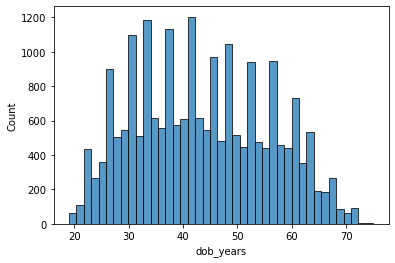

In [16]:
import seaborn as sns
sns.histplot(data=df, x="dob_years")

In [17]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'years_employed', 'age_group',
       'has_children', 'income_bracket', 'purpose_stem'],
      dtype='object')

In [18]:
def has_debt(debt): #I like to name my function the same as the column it will become
    if debt > 0:
        return "Has Debt"
    else:
        return "Debt Free"
# Create a new column by applying our function to the old column.
df['has_debt'] = df['debt'].apply(has_debt)
# Display the value counts of our new column
df['has_debt'].value_counts()

Debt Free    19784
Has Debt      1741
Name: has_debt, dtype: int64

In [19]:
df['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
housing transactions                        653
buying property for renting out             653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
purchase of my own house                    620
building a property                         620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [20]:
df.groupby(['children'])['debt'].mean().reset_index()

,children,debt
0,0,0.075129
1,1,0.091470
2,2,0.094791
3,3,0.081818
4,4,0.097561
5,5,0.000000


<AxesSubplot:xlabel='children', ylabel='Count'>

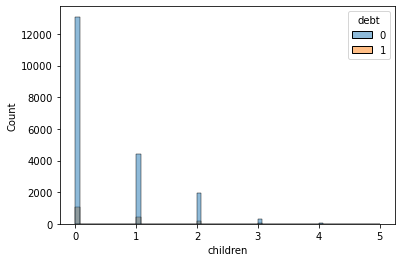

In [21]:
# compare debt to children
sns.histplot(data=df, x="children", hue='debt')

In [22]:
df['purpose'].count()

21525

In [23]:
def general_purpose(purpose):
    if ('building' in purpose) or ('property' in purpose) or ('real estate' in purpose):
        return 'real estate'
    else:
        return 'not real estate'

# Create a new column by applying our function to the old column.
df['general_purpose'] = df['purpose'].apply(general_purpose)
# Display the value counts of our new column
df['general_purpose'].value_counts()

not real estate    14505
real estate         7020
Name: general_purpose, dtype: int64

In [24]:
df.groupby(['purpose'])['debt'].count().reset_index()

,purpose,debt
0,building a property,620
1,building a real estate,626
2,buy commercial real estate,664
3,buy real estate,624
4,buy residential real estate,607
5,buying a second-hand car,479
6,buying my own car,505
7,buying property for renting out,653
8,car,495
9,car purchase,462
